In [1]:
%pylab inline 
import numpy as np
import cv2
from sklearn.utils import shuffle
import pandas as pd

from keras.models import Model
from keras.layers import Cropping2D, Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Lambda, concatenate, Activation
from keras import initializers
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
data_path = 'c:\\Users\\viacheslav.maslov\\study\\udacity\\Behavioral-Cloning\\data\\'
log = pd.read_csv(data_path + 'driving_log.csv')

In [67]:
from keras.applications import resnet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalAveragePooling2D



In [49]:
base_model = resnet50.ResNet50(weights='imagenet', include_top=False) #, input_tensor=in_tensor)

In [68]:
x = base_model.layers[-2].output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dense(1)(x)
model = Model(inputs=base_model.input, outputs=x)

In [64]:
for layer in base_model.layers:
    layer.trainable = False

In [69]:
model.compile('adam', 'mse')

In [70]:
for lay in model.layers:
    print("{:<20}: {}".format(lay.name, lay.output_shape[1:]))

input_16            : (None, None, 3)
zero_padding2d_12   : (None, None, 3)
conv1               : (None, None, 64)
bn_conv1            : (None, None, 64)
activation_540      : (None, None, 64)
max_pooling2d_12    : (None, None, 64)
res2a_branch2a      : (None, None, 64)
bn2a_branch2a       : (None, None, 64)
activation_541      : (None, None, 64)
res2a_branch2b      : (None, None, 64)
bn2a_branch2b       : (None, None, 64)
activation_542      : (None, None, 64)
res2a_branch2c      : (None, None, 256)
res2a_branch1       : (None, None, 256)
bn2a_branch2c       : (None, None, 256)
bn2a_branch1        : (None, None, 256)
add_177             : (None, None, 256)
activation_543      : (None, None, 256)
res2b_branch2a      : (None, None, 64)
bn2b_branch2a       : (None, None, 64)
activation_544      : (None, None, 64)
res2b_branch2b      : (None, None, 64)
bn2b_branch2b       : (None, None, 64)
activation_545      : (None, None, 64)
res2b_branch2c      : (None, None, 256)
bn2b_branch2c       

In [41]:
for lay in model.layers:
    print("{:<20}: {}".format(lay.name, lay.output_shape[1:]))

input_8             : (224, 224, 3)
zero_padding2d_7    : (230, 230, 3)
conv1               : (112, 112, 64)
bn_conv1            : (112, 112, 64)
activation_295      : (112, 112, 64)
max_pooling2d_7     : (55, 55, 64)
res2a_branch2a      : (55, 55, 64)
bn2a_branch2a       : (55, 55, 64)
activation_296      : (55, 55, 64)
res2a_branch2b      : (55, 55, 64)
bn2a_branch2b       : (55, 55, 64)
activation_297      : (55, 55, 64)
res2a_branch2c      : (55, 55, 256)
res2a_branch1       : (55, 55, 256)
bn2a_branch2c       : (55, 55, 256)
bn2a_branch1        : (55, 55, 256)
add_97              : (55, 55, 256)
activation_298      : (55, 55, 256)
res2b_branch2a      : (55, 55, 64)
bn2b_branch2a       : (55, 55, 64)
activation_299      : (55, 55, 64)
res2b_branch2b      : (55, 55, 64)
bn2b_branch2b       : (55, 55, 64)
activation_300      : (55, 55, 64)
res2b_branch2c      : (55, 55, 256)
bn2b_branch2c       : (55, 55, 256)
add_98              : (55, 55, 256)
activation_301      : (55, 55, 256)
re

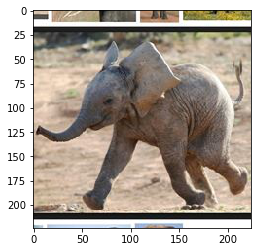

In [59]:
img = cv2.imread('elephant.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)
# img = preprocess_input(img.astype(np.float32))
imshow(img[0])

In [60]:
preds = model.predict(img)

In [71]:
X_data = np.load('X_data.npy')
y_data = np.load('y_data.npy')

0.0 0.2 -0.2


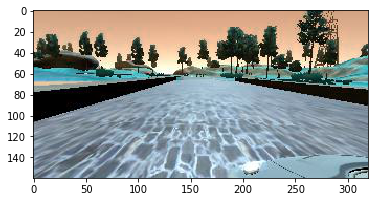

In [72]:
imshow(X_data[1])
print(y_data[0], y_data[1], y_data[2])


In [73]:
X_data.shape

(24108, 160, 320, 3)

In [74]:
preds = model.predict(img[0:1])

In [79]:
history = model.fit(X_data, y_data, 
                    epochs=20, verbose=2, batch_size=10,
                    validation_split = 0.1,
                    shuffle = True,
                    callbacks=[
                        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=2),
                        #ModelCheckpoint("LeNet_onImadjust/m5.{epoch:02d}-{val_loss:.4f}.hdf5"),
                        EarlyStopping(monitor='val_loss', patience=20, verbose=2, min_delta=1e-03)])

Train on 21697 samples, validate on 2411 samples
Epoch 1/20
597s - loss: 0.0648 - val_loss: 0.0204
Epoch 2/20
595s - loss: 0.0153 - val_loss: 0.0176
Epoch 3/20
595s - loss: 0.0137 - val_loss: 0.0174
Epoch 4/20
601s - loss: 0.0129 - val_loss: 0.0171
Epoch 5/20
597s - loss: 0.0123 - val_loss: 0.0195
Epoch 6/20
595s - loss: 0.0119 - val_loss: 0.0175
Epoch 7/20
601s - loss: 0.0112 - val_loss: 0.0172
Epoch 8/20
594s - loss: 0.0110 - val_loss: 0.0175
Epoch 9/20
596s - loss: 0.0108 - val_loss: 0.0191
Epoch 10/20

Epoch 00009: reducing learning rate to 0.0005000000237487257.
599s - loss: 0.0106 - val_loss: 0.0182
Epoch 11/20
589s - loss: 0.0094 - val_loss: 0.0172
Epoch 12/20
597s - loss: 0.0091 - val_loss: 0.0196
Epoch 13/20
597s - loss: 0.0090 - val_loss: 0.0186
Epoch 14/20
597s - loss: 0.0090 - val_loss: 0.0174
Epoch 15/20
592s - loss: 0.0089 - val_loss: 0.0169
Epoch 16/20
593s - loss: 0.0087 - val_loss: 0.0191
Epoch 17/20
596s - loss: 0.0087 - val_loss: 0.0173
Epoch 18/20
595s - loss: 0.008

In [80]:
model.save('ml_resnet_001.h5')

In [81]:
from keras import backend as K
K.clear_session()